In [1]:
import pandas as pd

In [5]:
#loading the dataset
df=pd.read_csv("owid-covid-data.csv")

In [7]:
#check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194031 entries, 0 to 194030
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    194031 non-null  object 
 1   continent                                   182762 non-null  object 
 2   location                                    194031 non-null  object 
 3   date                                        194031 non-null  object 
 4   total_cases                                 186353 non-null  float64
 5   new_cases                                   186133 non-null  float64
 6   new_cases_smoothed                          184959 non-null  float64
 7   total_deaths                                167820 non-null  float64
 8   new_deaths                                  167801 non-null  float64
 9   new_deaths_smoothed                         166638 non-null  float64
 

In [9]:
# Preview first few rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()


iso_code                                        0
continent                                   11269
location                                        0
date                                            0
total_cases                                  7678
                                            ...  
human_development_index                     38331
excess_mortality_cumulative_absolute       187425
excess_mortality_cumulative                187425
excess_mortality                           187425
excess_mortality_cumulative_per_million    187425
Length: 67, dtype: int64

In [15]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Filter specific countries (Kenya, USA, India)
countries = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries)]

In [21]:
df_filtered = df[df['location'].isin(countries)].copy()  # Create a proper copy
df_filtered = df_filtered.ffill()  # Apply forward-fill correctly


In [23]:
# Check missing values again
df_filtered.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       1698
excess_mortality_cumulative                1698
excess_mortality                           1698
excess_mortality_cumulative_per_million    1698
Length: 67, dtype: int64

In [30]:
df_filtered.drop(columns=['excess_mortality_cumulative_absolute', 
                          'excess_mortality_cumulative', 
                          'excess_mortality', 
                          'excess_mortality_cumulative_per_million'], inplace=True)


In [32]:
# Check missing values again
df_filtered.isnull().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                   0
                             ..
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
Length: 63, dtype: int64

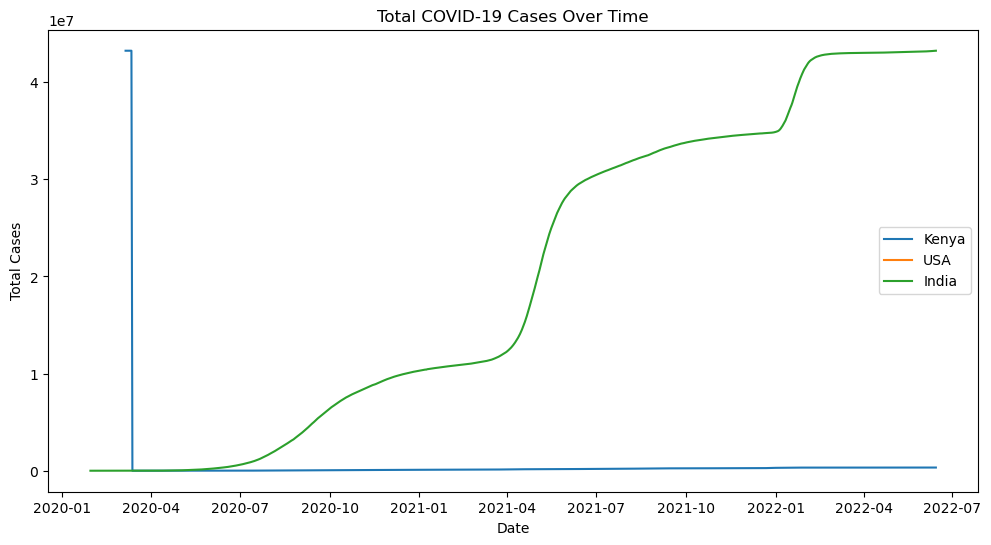

In [34]:
import matplotlib.pyplot as plt
#Analyzing Total COVID-19 Cases Over Time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


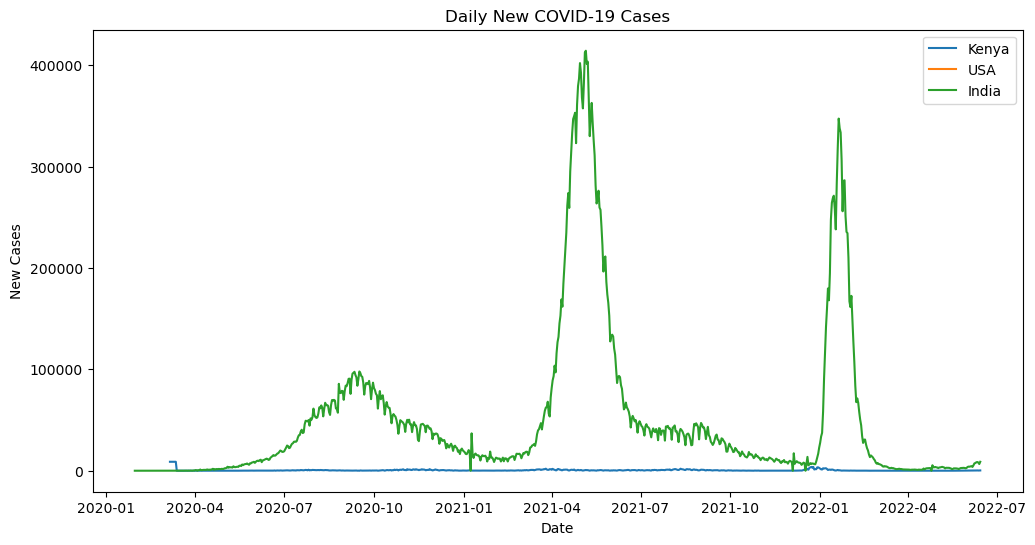

In [36]:
#Compare Daily New Cases
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


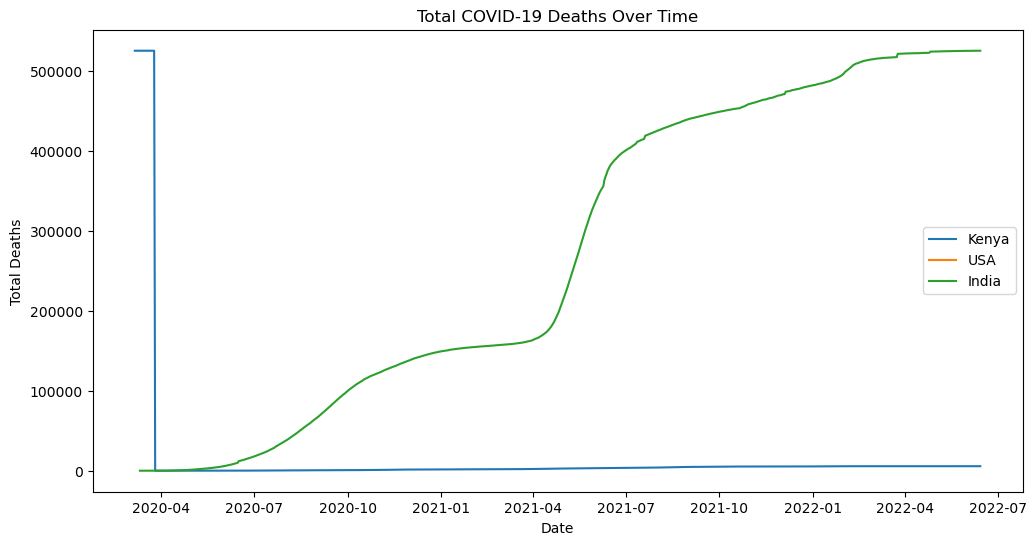

In [44]:
#Total Deaths Over Time Visualization
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


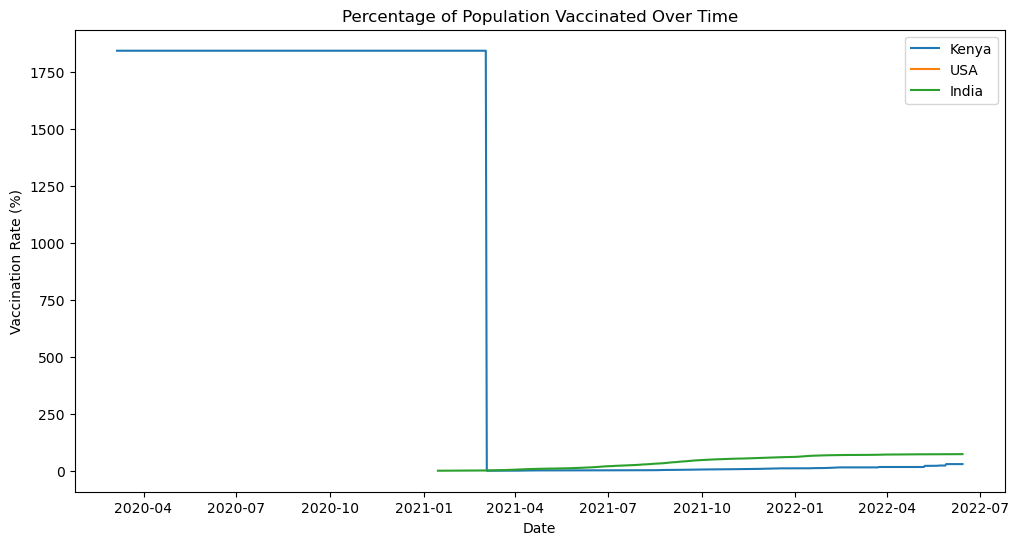

In [46]:
#calculating the % of population vaccinated, we divide people_vaccinated by population:
df_filtered['vaccination_rate'] = df_filtered['people_vaccinated'] / df_filtered['population'] * 100

plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['vaccination_rate'], label=country)

plt.title("Percentage of Population Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("Vaccination Rate (%)")
plt.legend()
plt.show()


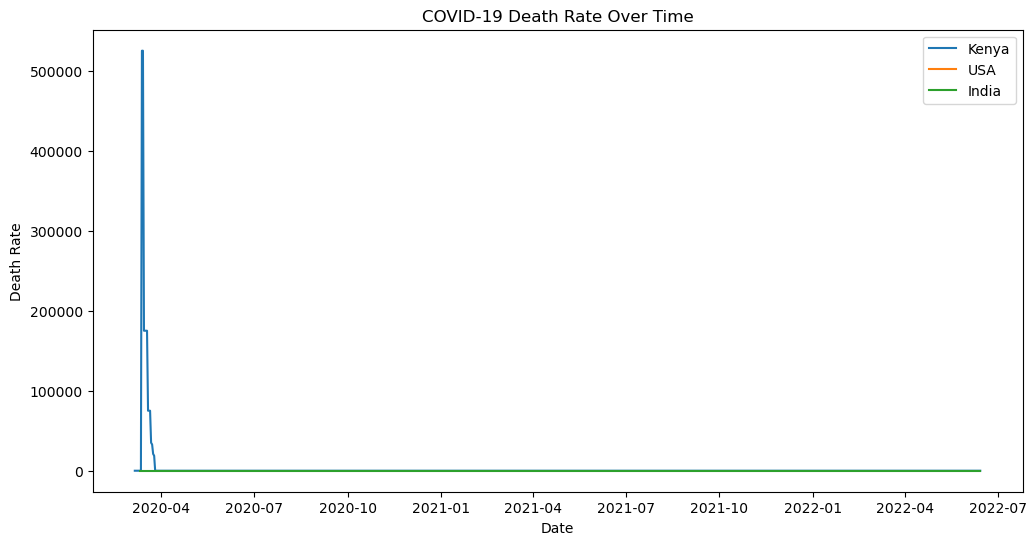

In [38]:
#death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


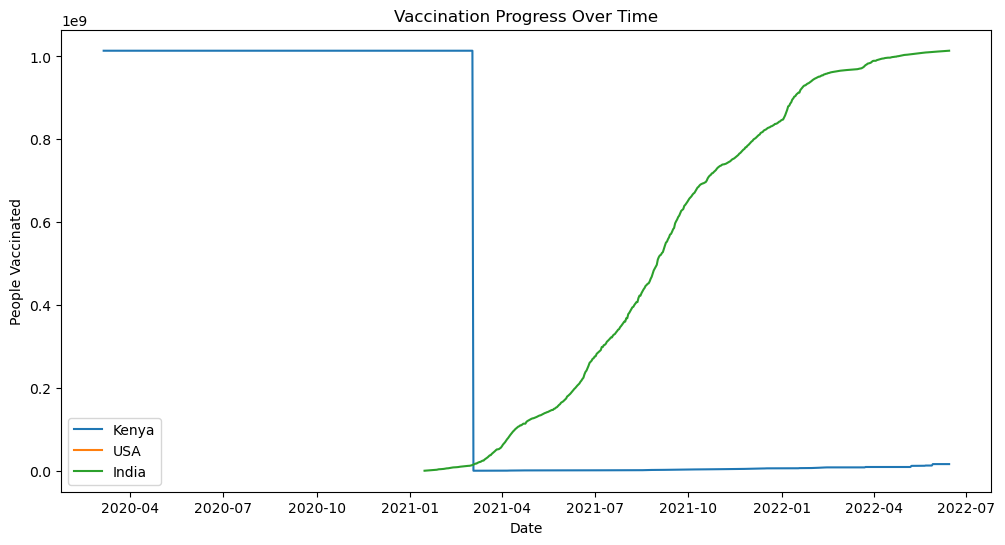

In [40]:
import seaborn as sns
#Visualizing Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['people_vaccinated'], label=country)

plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.show()


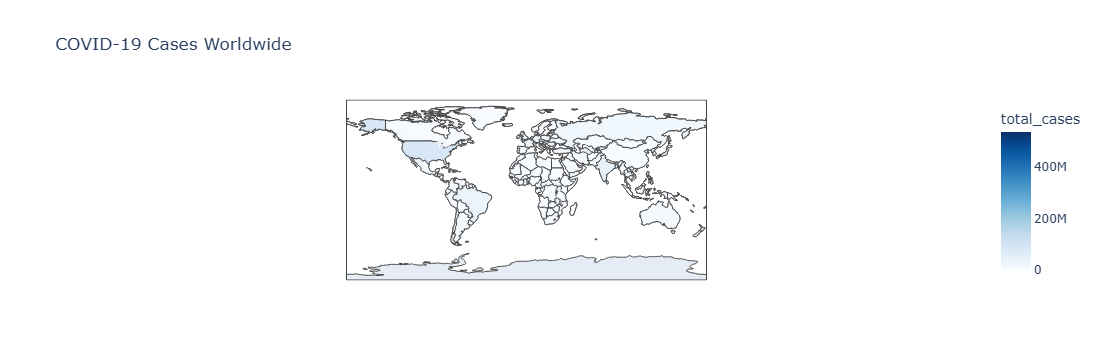

In [48]:
import plotly.express as px

latest_df = df[df['date'] == df['date'].max()]  # Get latest data
fig = px.choropleth(latest_df, 
                    locations="location", 
                    locationmode="country names", 
                    color="total_cases",
                    title="COVID-19 Cases Worldwide",
                    color_continuous_scale="blues")

fig.show()
